# Lab 01 session: Using MatPlotLib, Seaborn, Altair and Tableau for visualisation

**Idiom-based**: [MatPlotLib](https://matplotlib.org/) is a quite basic plotting library that is popular and the basis for many other plotting libraries in Python. [Seaborn](https://seaborn.pydata.org/) is a more advanced visualisation libary. Both are idiom-based libraries in that they have separate functions for different types of visualisation (idiom).

**Grammar-based**: [Altair](https://altair-viz.github.io/) (a Python port of JavaScript's [VegaLite](https://vega.github.io/vega-lite/)). Tableau is **non-Python stand-alone** software driven by a graphical user interface which is grammar-based.

## Documentation

You'll find full documentation online on the library websites (go and find them). The documentation is the best systematic way of finding out details of how to use the library. However, summaries, examples and cheatsheets are often best to get a grasp of how these work. These libraries are widely used, so you'll find lots of help online. Here are some ideas.

 - **MatPlotLib**: The [cheatsheets](https://matplotlib.org/cheatsheets/) are a great summary of what types of plot (idioms) are supported and how to used them.
 - **Seaborn**: Seaborn don't have any of their own cheatsheets, but others have made some, including these from [Kaggle](https://www.kaggle.com/code/themlphdstudent/cheat-sheet-seaborn-charts)
 - **Altair**: Altair also don't seems to have their own cheatsheets, but their [examples](https://altair-viz.github.io/gallery/index.html) are a good way to get started.
 - **Tableau**: Tableau has lots of official support (it's commercial software) and there's a tutorial here: https://help.tableau.com/current/guides/get-started-tutorial/en-us/get-started-tutorial-home.htm
 
 ## Data
 
 For this examples, we will use some Seattle weather data, one of the example datasets supplied by Altair. You can load it into a Pandas dataframe in the following way and display the top 5 rows:

In [1]:
from vega_datasets import data

weather_data = data.seattle_weather()
weather_data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


The nominal weather categories are as follows:

In [3]:
weather_data.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

## Scatterplots

Scatterplots are a visualisation technique for looking at pairwise relationships between variables. Each plot is a record (row) and each axis is a variable (column).

They use the *x-position* and *y-position* visual variables which are the more effective for quantitative data. Additionally, *hue* and *shape* are regularly used to convey *nominal* data and *lightness* to convey quantitative data. 

### MatPlotLib

We used MatPlotLib `scatter()` function, giving at an array of x-values, y-values and (optionally colour-values. Note that you will have to label the axes yourself and then call `plt.show()` to show it.

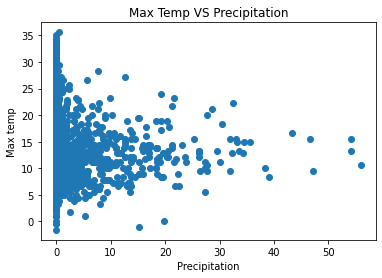

In [4]:
import matplotlib.pyplot as plt

plt.scatter(weather_data.precipitation,weather_data.temp_max)
plt.xlabel('Precipitation')
plt.ylabel('Max temp')
plt.title("Max Temp VS Precipitation")
plt.show()

 See the documentation for additional *kwargs* (keyword arguments). Below, we assign a *hue* to each weather type in a *dictionary* (`colour_lookup`), use this to create a column (`colour_column`) and then use the `color` *kwargs* (keyword argument).

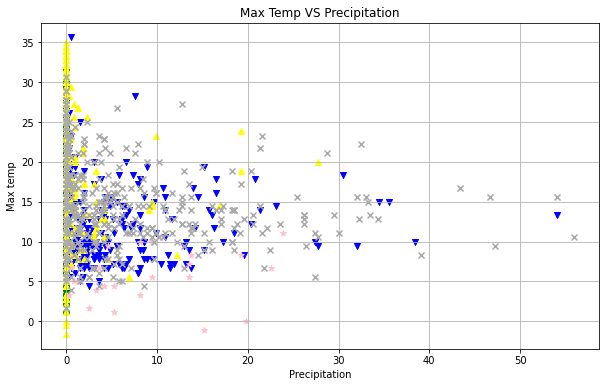

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
# Assuming 'weather_data' is a DataFrame available here

# FIX THE '1' MARKER TO A MORE ROBUST SYMBOL LIKE 'x'
colour_lookup = {'drizzle': 'green', 'rain': 'blue', 'sun': 'yellow', 'snow': 'pink', 'fog': 'darkgray'}
marker_lookup = {'drizzle': 'o', 'rain': 'v', 'sun': '^', 'snow': '*', 'fog': 'x'} # <-- FIX IS HERE

plt.figure(figsize=(10, 6))

# Get the list of unique weather types
unique_weather = weather_data['weather'].unique()

# Plot each weather type separately to ensure correct marker assignment
for weather_type in unique_weather:
    # Filter data for the current weather type
    subset = weather_data[weather_data['weather'] == weather_type]

    # Plot the subset using the specific color and marker
    plt.scatter(
        subset.precipitation,
        subset.temp_max,
        color=colour_lookup[weather_type],
        marker=marker_lookup[weather_type],
        label=weather_type.capitalize()
    )

plt.xlabel('Precipitation')
plt.ylabel('Max temp')
plt.grid()
plt.title("Max Temp VS Precipitation")

# You explicitly said to ignore the legend, but it's good practice to show
# what the different markers mean. If you want to see the legend later:
# plt.legend(title="Weather Type")

plt.show()

### Seaborn

**Seaborn** is also idiom-based, so it has different functions for different types of visualisation techniques. Here we used `scatterplot().`

In Seaborn you supply the entire Pandas dataframe, and then tell it which columns you want to use. This means it can label axes for you. It will also automatically assign hues for you, though you can use *kwargs* (keyword arguments) to override this.

<AxesSubplot:xlabel='precipitation', ylabel='temp_max'>

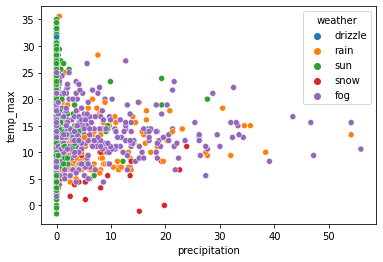

In [3]:
import seaborn as sns

sns.scatterplot(x="precipitation", y="temp_max", data=weather_data, hue="weather")

### Altair

Altair is grammar-based, rather than specifying the type, we specify the:
 - mark type
 - the mapping between visual variables and data variable (columns).
 
Check the version (5.1.1 is the latest). If you need to upgrade, you can use `pip install -U altair vega_datasets`

In [6]:
import altair as alt

alt.__version__

'5.1.1'

Below is the simplest use of Altair using a **shortcut** approach:
 - specify the data in `Chart`
 - specify the mark type as `mark_point()`
 - specify the mappings between visual variables and data variables within `encode()`

In [17]:
import altair as alt

alt.Chart(weather_data).mark_point().encode(
    x='precipitation',
    y='temp_max',
    color='weather'
)

alt.Chart(...)

This is the **expanded version** which you need specify more detail (here, we specify titles). Otherwise, it looks the same.

In [18]:
import altair as alt

alt.Chart(weather_data).mark_point().encode(
  alt.X('precipitation').title("Precipitation (mm)"),
  alt.Y('temp_max').title("Maximum temperature (C)"),
  alt.Color('weather')
)

alt.Chart(...)

In [25]:
alt.Chart(weather_data).mark_point().encode(
  alt.X('precipitation').title("Precipitation (mm)"),
  alt.Y('temp_max').title("Maximum temperature (C)"),
  alt.Color('weather')
).transform_filter(alt.datum.weather == 'drizzle')

alt.Chart(...)

In [9]:
weather_data.to_csv("Lab01_weather_data.csv",index=False)

### Tableau

Tableau is (non-Python) stand-alone software driven by a graphical user interface which is grammar-based. The csv file has been exported into this directory (see above) and you can load that in Tableau.

 - Drag the file onto the Tableau window. You'll see a preview in the `data source` window
 - Click on `Sheet 1` to go to a new worksheet
 - On the left, you'll see `dimensions` (categorical variables; blue) and `measures` (quantitative variables; green)
 - map the variables to the visual variables
   - Drag the `Precipitation` variable to the `columns shelf` (x-position)
   - Drag `Temp Max` variable to the `rows shelf` (y-position)
   - Drag the "Weather" variable to the `colour shelf`
   - Go to the `analysis` menu and turn off `aggregate measures`
   - Double-click on the `shelves` (colour, size, etc) to customise.
   - Add a new sheet to try something else

(Image below is base64 encoded using https://www.base64-image.de/ so it exports properly)

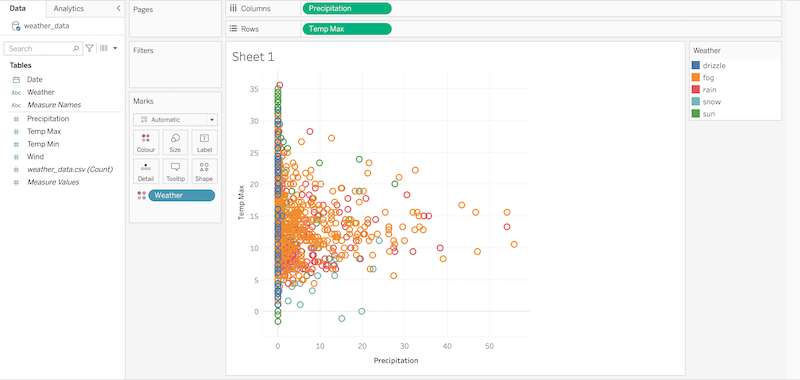


## Tasks

### Task 1: Critique the scatterplots

What do these seem to show? Any problems that might affect interpretation?


1. The individual mark represents the particular date
2. Sunny weather as less precipitation
3. When there is rainfall the Max temp is low
4. 

### Task 2: How can you improve this?

Using one or more of the libraries/software above, try and improve them, using Google searches and the documentation. You might want to try:
 - Changing the size of the dots/circles
 - Making them semi-transparent/opaque
 - Aggregating (e.g. one mark per weather type and using the average precipitation/temperature for each weather type?
 - Using binning to make a histogram or binned scatterplot.

(Answer here)

### Task 3: Explore, interpret and critique

To prepare you for your **group coursework**, use [this tutorial](https://altair-viz.github.io/case_studies/exploring-weather.html#) as inspiration to come up with visual representation designs of the Seattle weather data that convey different aspects of the data. For each design:
 - **Implement**: implement it using whichever sorfware you like
 - **Purpose**: Say what the intended purpose is
 - **Justify**: Justify the design in terms of effectiveness of visual variables for its intended purpose
 - **Critique**: the design and give limitations
 - **Interpret**: what insights does the graphic provide?

Post one of these on Moodle in the special forum for this week. We can discuss these on Moodle and next week.
 
Here's an example:

### Task 3: Explore, interpret and critique

To prepare you for your **group coursework**, use [this tutorial](https://altair-viz.github.io/case_studies/exploring-weather.html#) as inspiration to come up with visual representation designs of the Seattle weather data that convey different aspects of the data. For each design:
 - **Implement**: using seaborn(Python)
 - **Purpose**: To identify the Temp. and Weather pattern throughtout the period(2012-2015)
 - **Justify**: Scatterplot can represent individual datapoint on the plot which is helpful in visualising the changing weather week by week and it fulfila the purpose of identifying relationship between weather and temp.

 - **Critique**: 
 
 <br>Design: 
 1. Each dot(cricle) represents the individual datapoint in the dataset.
 2. x-axis represents weeks of a year & y-axis represents min temp(deg C)
 3. 5 different colours(hue) is used to represent 5 weather conditions.
 4. Size of the circular mark represents the precipitation(mm).
 
 
 
 
 
 <br>
 Limitation:
 
 
 1. 
 
 
 
 
 - **Interpret**: 
1. Weather pattern of location "Seattle" has changed significatly. Earlier, in 2012 there used to be rain almost 40 weeks a year, but gradually it reduced.(Reduced orange marks)
2. Similarly, the snowfall has also reduced in the area(Reduced Red marks).
3. Sunny weather is becoming prominent year by year and as a result the min temp is rising.(Earlier there were very few marks over 15deg C, now significant points are over 15 deg C)
4. Now, foggy weather results in the max. precipitation(bigger sized markers of purple colour in 2014-15). Earlier Rain was highest contributor.

In [1]:
Implement: using seaborn(Python)
Purpose: To identify the Temp. and Weather pattern throughtout the period(2012-2015)
Justification: Scatterplot can represent individual datapoint on the plot which is helpful in visualising the changing weather week by week and it fulfila the purpose of identifying relationship between weather and temp.
Critique
Design:
 Each dot(circle) represents the individual datapoint in the dataset.
 x-axis represents weeks of a year & y-axis represents min temp(deg C)
5 different colours (hue) is used to represent 5 weather conditions.
Size of the circular mark represents the precipitation(mm).
Interpret:
Weather pattern of location "Seattle" has changed significantly. Earlier, in 2012 there used to be rain almost 40 weeks a year, but gradually it reduced.(Reduced orange marks)
Similarly, the snowfall has also reduced in the area(Reduced Red marks).
Sunny weather is becoming prominent year by year and as a result the min temp is rising.(Earlier there were very few marks over 15deg C, now significant points are over 15 deg C)
Now, foggy weather results in the max. precipitation(bigger sized markers of purple colour in 2014-15). Earlier Rain was highest contributor.

SyntaxError: invalid non-printable character U+00A0 (3365028536.py, line 6)

In [178]:
alt.Chart(weather_data).mark_bar().encode(
    x='month(date):O',
    y='count()',
    color='weather',
)

alt.Chart(...)

In [114]:
weather_data.date.min()

Timestamp('2012-01-01 00:00:00')

In [2]:
import seaborn as sns
import numpy as np

C:\Users\iamd3\AppData\Local\Temp\ipykernel_19120\4290829297.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  p=sns.scatterplot(data=weather_data[weather_data.date.dt.year==2012],x=weather_data['date'].dt.week,y=weather_data['temp_min'],
C:\Users\iamd3\AppData\Local\Temp\ipykernel_19120\4290829297.py:21: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  p=sns.scatterplot(data=weather_data[weather_data.date.dt.year==2013],x=weather_data['date'].dt.week,y=weather_data['temp_min'],
C:\Users\iamd3\AppData\Local\Temp\ipykernel_19120\4290829297.py:33: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  p=sns.scatterplot(data=weather_data[weather_data.date.dt.year==2014],x=weather_data['date'].dt.week,y=weather_data['temp_min'],
C:\Users\iamd3\AppData\Local\

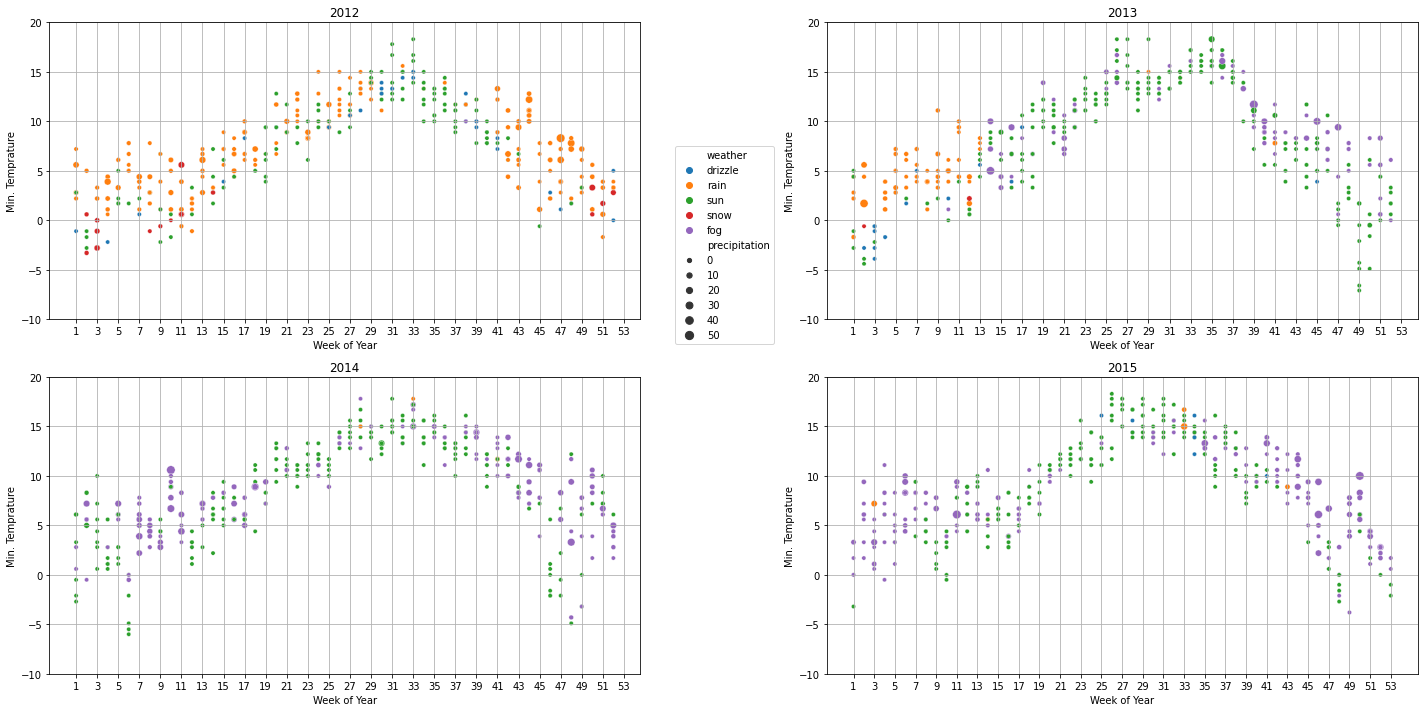

In [188]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.tight_layout()
plt.grid()
plt.ylim(-10,20)
plt.title("2012")

p=sns.scatterplot(data=weather_data[weather_data.date.dt.year==2012],x=weather_data['date'].dt.week,y=weather_data['temp_min'],
                  hue=weather_data.weather,size="precipitation",
                 legend="brief")
p.set(xlabel="Week of Year",ylabel="Min. Temprature")
plt.xticks(np.arange(1,54,2))
p.legend(loc='center left', bbox_to_anchor=(1.05, 0.25))

plt.subplot(2,2,2)
plt.tight_layout()
plt.grid()
plt.ylim(-10,20)
plt.title("2013")

p=sns.scatterplot(data=weather_data[weather_data.date.dt.year==2013],x=weather_data['date'].dt.week,y=weather_data['temp_min'],
                  hue=weather_data.weather,size="precipitation",
                 legend=None)
p.set(xlabel="Week of Year",ylabel="Min. Temprature")
plt.xticks(np.arange(1,54,2))

plt.subplot(2,2,3)
plt.tight_layout()
plt.grid()
plt.ylim(-10,20)
plt.title("2014")

p=sns.scatterplot(data=weather_data[weather_data.date.dt.year==2014],x=weather_data['date'].dt.week,y=weather_data['temp_min'],
                  hue=weather_data.weather,size="precipitation",
                 legend=None)
p.set(xlabel="Week of Year",ylabel="Min. Temprature")
plt.xticks(np.arange(1,54,2))

plt.subplot(2,2,4)
plt.tight_layout()
plt.grid()
plt.ylim(-10,20)
plt.title("2015")

p=sns.scatterplot(data=weather_data[weather_data.date.dt.year==2015],x=weather_data['date'].dt.week,y=weather_data['temp_min'],
                  hue=weather_data.weather,size="precipitation",
                 legend=None)
p.set(xlabel="Week of Year",ylabel="Min. Temprature")
plt.xticks(np.arange(1,54,2))

plt.savefig("submit",facecolor="white",dpi=270)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1152x432 with 0 Axes>

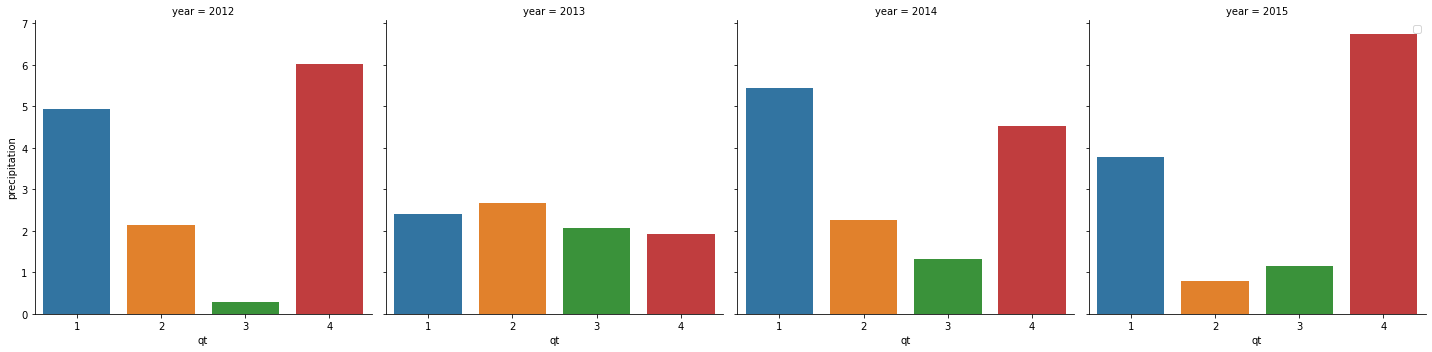

In [58]:

plt.figure(figsize=(16,6))
sns.catplot(kind='bar',data=weather_data,x="qt",y="precipitation",ci=0,hue=None,col="year")
plt.legend()

In [44]:
weather_data['qt'] = weather_data['date'].dt.quarter
weather_data['year'] = weather_data['date'].dt.year

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1152x720 with 0 Axes>

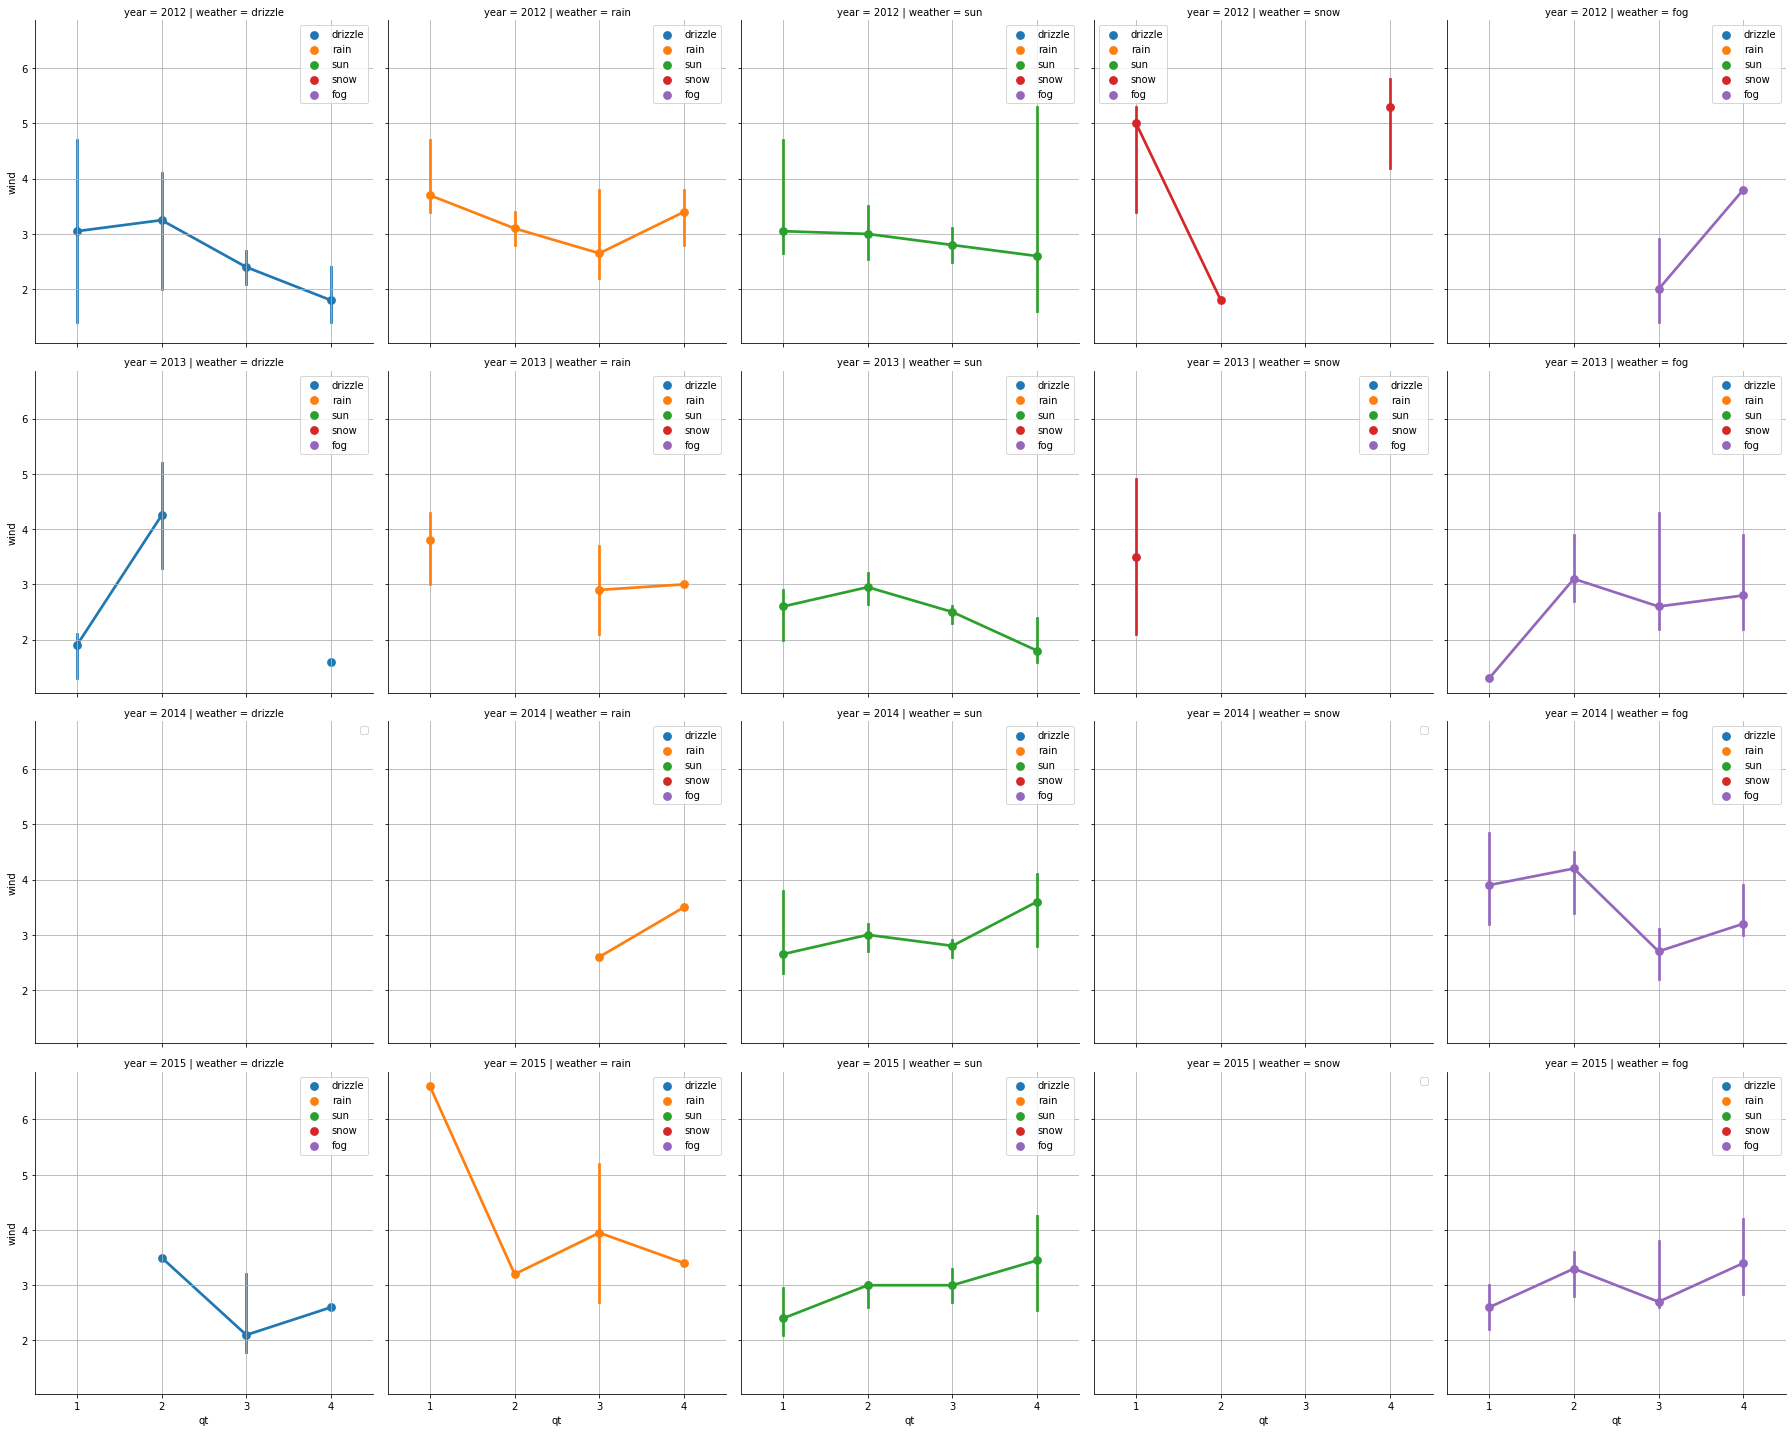

In [52]:
# plt.grid()
plt.figure(figsize=(16,10))
g=sns.catplot(kind="point",data=weather_data, y="wind",x="qt",col="weather",row="year",estimator=np.median,hue="weather")
# plt.xticks(["Q1","Q2","Q3","Q4"])

for ax in g.axes.flat:
    ax.grid(True)
    ax.legend()

In [23]:
import seaborn as sns

<AxesSubplot:xlabel='date', ylabel='precipitation'>

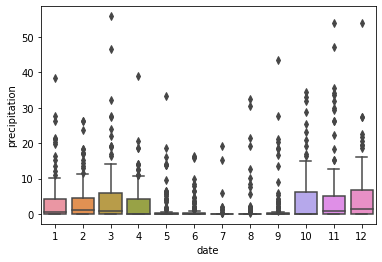

In [31]:
sns.boxplot(data=weather_data,x=weather_data['date'].dt.month,y=weather_data['precipitation'])

 - **Purpose**: Compare the number of days of weather type per month, across the three years of data.
 - **Justification**: Aligned length is the most effective visual variable for enabing quantities to be compared. Hue is an effective visual variable for a nominal variable such as weather type with only a few variable values (five). Months are ordered temporally to help reveal temporal trends.
 - **Critique**: It might be better to consider proportions rather than number of days as different months have different numbers of days. We also don't see whether this differs by year.
 - **Interpret**: It shows that there are many more sunny days in the summer months. There seem to be a strong seasonal difference with similar numbers of sunny days in winter days and similar numbers of sunny days in summer days. The are similar drizzle days each month.

(Answer here)

### Task 4: Transform the data to design a new visualisation 

Here's a visualisation with two layers:
 - line graph of number of days of each weather type by month directly
 - average number of days across all months
 
See the code to produce this below.

Notice that each visualisation is saved as a variable, and the <code>+</code> operator layers them.

Also notice that the second layer uses a dataframe called <code>monthlyAvg</code>

Your task is to use Pandas to produce this dataframe so the code below works.

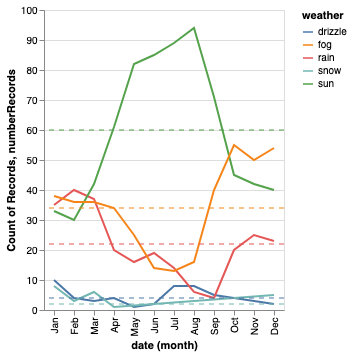

In [11]:
import pandas as pd

#line graph
lineChart=alt.Chart(weather_data).mark_line().encode(
    x='month(date):O',
    y='count()',
    color='weather',
)

#YOU'LL NEED TO CREATE A SUITABLE "averageLines" DATAFRAME!

#average (horizontal) lines
averageLines = alt.Chart(monthlyAvg).mark_rule(strokeDash=[5, 5],size=1).encode(
    y='numberRecords:Q',
    color='weather:N',
    detail='weather:N'
)

#layer them
lineChart + averageLines

NameError: name 'monthlyAvg' is not defined

As a reminder, here's the example of aggregation from the lecture:

In [ ]:
#The backslashes let us split the lines across multiple lines
aggrData = weather_data\
    .assign(month=weather_data['date'].dt.month)\
    .groupby(["month","weather"])\
    .size()\
    .reset_index(name="numDays")
    
aggrData